In [1]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

/Users/chithrabhat/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
location_Euro = "/Users/chithrabhat/Desktop/SFU/Machine Learning/Project/EURO_Dataset.csv"
euro_data = pd.read_csv(location_Euro)
df_predictor_euro = euro_data['num']
unused_cols = ['num', 'id','ccf','smoke', 'cigs','years','famhist','dummy','ca',
                'restckm','exerckm','restef','restwm','exeref','exerwm',
               'thalsev','thalpul','earlobe', 'lmt','ladprox',
               'laddist','diag','cxmain','ramus','om1','om2','rcaprox',
               'rcadist','lvx1', 'lvx2','lvx3','lvx4',
               'lvf','cathef','junk']

In [3]:
euro_data.drop(unused_cols, axis = 1,inplace = True)

In [4]:
data_processed_euro = pd.get_dummies(euro_data, columns=['cp', 'restecg','slope','thal','loc'])
scaler_euro = StandardScaler() 
scaler_euro.fit_transform(data_processed_euro)
condition_euro = df_predictor_euro == 0
data_processed_euro['target'] = np.where(condition_euro, 0 , 1)

In [5]:
data_euro = data_processed_euro.as_matrix()
train_x_euro, test_x_euro, train_y_euro, test_y_euro = train_test_split(data_euro[:, 0:-1], data_euro[:,-1],
                                                        train_size=0.7)

/Users/chithrabhat/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
decision = DecisionTreeClassifier(min_samples_split= 20, max_leaf_nodes= 25, min_weight_fraction_leaf=0.35, max_depth =8, min_samples_leaf= 25)
decision_model = decision.fit(train_x_euro,train_y_euro)
boost = AdaBoostClassifier(n_estimators=100,base_estimator = decision, learning_rate=0.1)
boost_model = boost.fit(train_x_euro,train_y_euro)
gradient = GradientBoostingClassifier(learning_rate=0.09, n_estimators=100, max_depth=3, min_samples_leaf=5,subsample=0.9)
gradient_model = gradient.fit(train_x_euro,train_y_euro)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.09,max_depth=3,subsample=0.9)
xgb_model = xgb.fit(train_x_euro,train_y_euro)

In [7]:
print("Training Set Accuracy:", (decision.score(train_x_euro,train_y_euro))*100)
decision_predictions = decision_model.predict(test_x_euro)
decision_accuracy = accuracy_score(test_y_euro, decision_predictions)
print("Decision Tree Accuracy:" , decision_accuracy*100)

('Training Set Accuracy:', 80.06872852233677)
('Decision Tree Accuracy:', 79.365079365079367)


In [8]:
print("Training Set Accuracy:", (boost.score(train_x_euro,train_y_euro))*100)
boost_predictions = boost_model.predict(test_x_euro)
boost_accuracy = accuracy_score(test_y_euro, boost_predictions)
print("Adaptive Boosting Classifier Accuracy:" , boost_accuracy*100)

('Training Set Accuracy:', 84.536082474226802)
('Adaptive Boosting Classifier Accuracy:', 80.952380952380949)


In [9]:
print("Training Set Accuracy:", (gradient.score(train_x_euro,train_y_euro))*100)
gradient_predictions = gradient_model.predict(test_x_euro)
gradient_accuracy = accuracy_score(test_y_euro, gradient_predictions)
print("Gradient Tree Boosting Classifier Accuracy:" , gradient_accuracy*100)

('Training Set Accuracy:', 100.0)
('Gradient Tree Boosting Classifier Accuracy:', 85.714285714285708)


In [10]:
print("Training Set Accuracy:", (xgb.score(train_x_euro,train_y_euro))*100)
xgb_predictions = xgb_model.predict(test_x_euro)
xgb_accuracy = accuracy_score(test_y_euro, xgb_predictions)
print("Extreme Boosting Classifier Accuracy:" , gradient_accuracy*100)

('Training Set Accuracy:', 98.969072164948457)
('Extreme Boosting Classifier Accuracy:', 85.714285714285708)


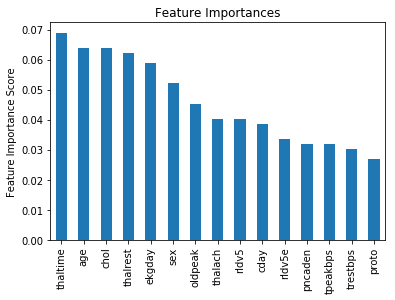

In [11]:
predictors = [x for x in data_processed_euro.columns if x not in ['target']]
feat_imp = pd.Series(xgb_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp.nlargest(15)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

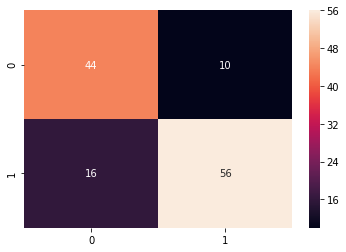

In [12]:
decision_cm = pd.DataFrame(confusion_matrix(test_y_euro, decision_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(decision_cm, annot=True)
plt.show()

In [13]:
TP = decision_cm[1][1]
TN = decision_cm[0][0]
FP = decision_cm[0][1]
FN = decision_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.84848484848484851)
('Specificity : ', 0.73333333333333328)


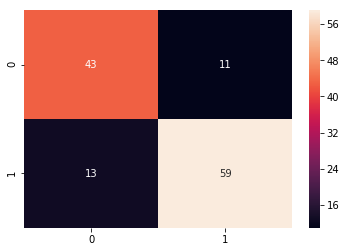

In [14]:
boost_cm = pd.DataFrame(confusion_matrix(test_y_euro, boost_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(boost_cm, annot=True)
plt.show()

In [15]:
TP = boost_cm[1][1]
TN = boost_cm[0][0]
FP = boost_cm[0][1]
FN = boost_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.84285714285714286)
('Specificity : ', 0.7678571428571429)


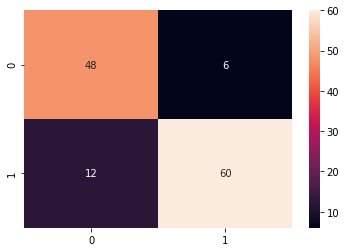

In [16]:
gradient_cm = pd.DataFrame(confusion_matrix(test_y_euro, gradient_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(gradient_cm, annot=True)
plt.show()

In [17]:
TP = gradient_cm[1][1]
TN = gradient_cm[0][0]
FP = gradient_cm[0][1]
FN = gradient_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.90909090909090906)
('Specificity : ', 0.80000000000000004)


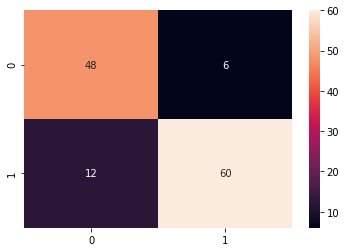

In [18]:
xgb_cm = pd.DataFrame(confusion_matrix(test_y_euro, xgb_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(xgb_cm, annot=True)
plt.show()

In [19]:
TP = xgb_cm[1][1]
TN = xgb_cm[0][0]
FP = xgb_cm[0][1]
FN = xgb_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.90909090909090906)
('Specificity : ', 0.80000000000000004)


In [20]:
vote = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                                     ('Naive Bayes', BernoulliNB()),
                                    ('DecisionTree', DecisionTreeClassifier()),
                                    ('SVM', SVC(kernel='linear', C=5))
                                    ], voting='hard')
vote_model = vote.fit(train_x_euro,train_y_euro)

In [21]:
print("Training Set Accuracy:", (vote.score(train_x_euro,train_y_euro))*100)
vote_predictions = vote_model.predict(test_x_euro)
vote_accuracy = accuracy_score(test_y_euro, vote_predictions)
print("Voting Classifier Accuracy:" , vote_accuracy*100)

('Training Set Accuracy:', 90.721649484536087)
('Voting Classifier Accuracy:', 85.714285714285708)


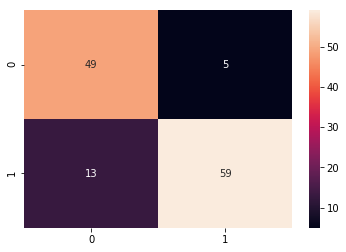

In [22]:
vote_cm = pd.DataFrame(confusion_matrix(test_y_euro, vote_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(vote_cm, annot=True)
plt.show()

In [23]:
TP = vote_cm[1][1]
TN = vote_cm[0][0]
FP = vote_cm[0][1]
FN = vote_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.921875)
('Specificity : ', 0.79032258064516125)


In [24]:
predictors = [x for x in data_processed_euro.columns if x not in ['target', 'id']]
param_test1 = {'n_estimators':range(20,200,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',subsample=0.9), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch1.fit(train_x_euro,train_y_euro)
gsearch1.best_params_

{'n_estimators': 50}

In [26]:
param_test2 = {'min_samples_leaf': range(1,8,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',subsample=0.9), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2.fit(train_x_euro,train_y_euro)
gsearch2.best_params_

{'min_samples_leaf': 1}